In [2]:
#######################

#this is a notebook for COSMIC variant profiling
#visualization done with matplotlib and seaborn
#@charlie sun@6/29/2016
#demo-only: the code is not cleaned and optimized

######################

%matplotlib inline

import pandas as pd
#import requests
#from bs4 import BeautifulSoup

#import time

from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

In [16]:
cosmic_df = pd.read_csv('/Users/sunq3/cindy_winter/new/filter.ou', sep='\t')
head_df = cosmic_df.head(2)
head_df = head_df.T
head_df
#head_df.describe()

,0,1
Gene name,IDH1,KRAS
Accession Number,ENST00000345146,ENST00000311936
Gene CDS length,1245,567
HGNC ID,5382,6407
Sample name,1333161,1504861
ID_sample,1333161,1504861
ID_tumour,1243635,1427739
Primary site,haematopoietic_and_lymphoid_tissue,large_intestine
...,...,...
FATHMM prediction,PATHOGENIC,PATHOGENIC


In [17]:
cosmic_df

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,SNP,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample source,Tumour origin,Age
0,IDH1,ENST00000345146,1245,5382.0,1333161,1333161,1243635,haematopoietic_and_lymphoid_tissue,NS,NS,...,n,-,PATHOGENIC,0.94085,Reported in another cancer sample as somatic,20368538.0,NaN,blood-bone marrow,NS,NaN
1,KRAS,ENST00000311936,567,6407.0,1504861,1504861,1427739,large_intestine,NS,NS,...,n,No,PATHOGENIC,0.98367,Reported in another cancer sample as somatic,21305640.0,NaN,surgery-fixed,NS,NaN
2,KRAS,ENST00000311936,567,6407.0,2414219,2414219,2277098,large_intestine,NS,NS,...,n,No,PATHOGENIC,0.98367,Reported in another cancer sample as somatic,24720724.0,NaN,surgery-fixed,NS,NaN
3,TP53,ENST00000269305,1182,11998.0,PC99-8,1374553,1284594,breast,NS,NS,...,n,-,PATHOGENIC,0.90383,Reported in another cancer sample as somatic,10203285.0,NaN,NS,NS,NaN
4,NRAS,ENST00000369535,570,7989.0,23,1687047,1595358,skin,NS,NS,...,n,Yes,PATHOGENIC,0.98635,Reported in another cancer sample as somatic,22536370.0,NaN,surgery fresh/frozen,NS,NaN
5,KRAS,ENST00000311936,567,6407.0,2415731,2415731,2278616,large_intestine,NS,NS,...,n,No,PATHOGENIC,0.97875,Reported in another cancer sample as somatic,24720724.0,NaN,surgery-fixed,NS,NaN
6,EGFR,ENST00000275493,3633,3236.0,1450846,1450846,1374989,lung,NS,NS,...,n,-,PATHOGENIC,0.98142,Reported in another cancer sample as somatic,20491778.0,NaN,surgery fresh/frozen,NS,44.0
7,TP53,ENST00000269305,1182,11998.0,DZ-8823,1370255,1280296,liver,NS,NS,...,n,-,NEUTRAL,0.28519,Reported in another cancer sample as somatic,10743047.0,NaN,surgery - NOS,NS,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,KIT,ENST00000288135,2931,6342.0,1630151,1630151,1547021,skin,mucosal,NS,...,n,-,PATHOGENIC,0.98167,Variant of unknown origin,22261812.0,NaN,surgery - NOS,NS,NaN


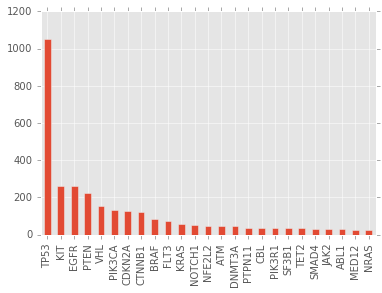

In [29]:
names = cosmic_df['Gene name'].value_counts()
names[:25].plot('bar')

In [27]:
cosmic_df['Gene name'].unique()

array(['IDH1', 'KRAS', 'TP53', 'NRAS', 'EGFR', 'MYD88', 'FGFR3', 'IDH2',
       'HRAS', 'SF3B1', 'KIT', 'GNAS', 'PIK3CA', 'FBXW7', 'CTNNB1', 'EZH2',
       'PTPN11', 'PTEN', 'FOXL2', 'KDR', 'MED12', 'FGFR2', 'VHL', 'ERBB2',
       'ALK', 'NFE2L2', 'SMAD4', 'AKT1', 'DNMT3A', 'PDGFRA', 'RET',
       'SMARCB1', 'BRAF', 'ATM', 'GNAQ', 'MTOR', 'U2AF1', 'ESR1', 'TET2',
       'C15orf23', 'CHEK2', 'JAK3', 'STAT3', 'CDKN2A', 'MPL', 'PPP2R1A',
       'JAK2', 'ABL1', 'XPO1', 'RHOA', 'RB1', 'FLT3', 'PIK3R1', 'BAP1',
       'CDH1', 'MAX', 'PIK3CA_ENST00000263967', 'MAP2K2_ENST00000262948',
       'NF1_ENST00000358273', 'GATA2', 'CBL', 'FBXW7_NM_018315_2', 'JAK1',
       'CSF1R', 'MET', 'APC', 'HNF1A', 'MAP2K1', 'NOTCH1', 'STK11',
       'NOTCH1_ENST00000277541', 'SPOP', 'PTCH1', 'MAPK1', 'WT1', 'ERBB4',
       'DDR2_ENST00000367922', 'CDK4', 'TET2_ENST00000305737', 'AR',
       'GATA3', 'NF1', 'ARAF', 'ERBB3_ENST00000267101', 'NF2', 'TSC2',
       'IFITM1', 'CDKN2A_ENST00000498124', 'ATM_ENST00000

In [30]:
cosmic_df.columns

Index([u'Gene name', u'Accession Number', u'Gene CDS length', u'HGNC ID',
       u'Sample name', u'ID_sample', u'ID_tumour', u'Primary site',
       u'Site subtype 1', u'Site subtype 2', u'Site subtype 3',
       u'Primary histology', u'Histology subtype 1', u'Histology subtype 2',
       u'Histology subtype 3', u'Genome-wide screen', u'Mutation ID',
       u'Mutation CDS', u'Mutation AA', u'Mutation Description',
       u'Mutation zygosity', u'LOH', u'GRCh', u'Mutation genome position',
       u'Mutation strand', u'SNP', u'Resistance Mutation',
       u'FATHMM prediction', u'FATHMM score', u'Mutation somatic status',
       u'Pubmed_PMID', u'ID_STUDY', u'Sample source', u'Tumour origin',
       u'Age'],
      dtype='object')

In [32]:
cosmic_df['Resistance Mutation'].value_counts()

-      3499
No       54
Yes      37
Name: Resistance Mutation, dtype: int64

In [35]:
cosmic_df[cosmic_df['Resistance Mutation'] == 'Yes']

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,SNP,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample source,Tumour origin,Age
4,NRAS,ENST00000369535,570,7989.0,23,1687047,1595358,skin,NS,NS,...,n,Yes,PATHOGENIC,0.98635,Reported in another cancer sample as somatic,22536370.0,NaN,surgery fresh/frozen,NS,NaN
98,PDGFRA,ENST00000257290,3270,8803.0,900424,900424,818036,soft_tissue,fibrous_tissue_and_uncertain_origin,NS,...,n,Yes,PATHOGENIC,0.99315,Reported in another cancer sample as somatic,15146165.0,NaN,surgery-fixed,primary,NaN
152,ESR1,ENST00000440973,1788,3467.0,2367119,2367119,2229977,breast,NS,NS,...,n,Yes,PATHOGENIC,0.95916,Reported in another cancer sample as somatic,25746663.0,NaN,surgery-fixed,metastasis,NaN
264,ABL1,ENST00000318560,3393,76.0,1874596,1874596,1765187,haematopoietic_and_lymphoid_tissue,NS,NS,...,n,Yes,PATHOGENIC,0.97433,Variant of unknown origin,23355941.0,NaN,blood-bone marrow,NS,NaN
332,ALK,ENST00000389048,4863,427.0,2144805,2144805,2014019,lung,NS,NS,...,n,Yes,PATHOGENIC,0.98991,Reported in another cancer sample as somatic,24736079.0,NaN,surgery-fixed,recurrent,61.0
341,KIT,ENST00000288135,2931,6342.0,1213218,1213218,1125085,haematopoietic_and_lymphoid_tissue,NS,NS,...,n,Yes,PATHOGENIC,0.99840,Reported in another cancer sample as somatic,19181784.0,NaN,blood-bone marrow,NS,31.0
424,ABL1,ENST00000318560,3393,76.0,903859,903859,821406,haematopoietic_and_lymphoid_tissue,NS,NS,...,n,Yes,PATHOGENIC,0.96053,Variant of unknown origin,11853795.0,NaN,blood-bone marrow,recurrent,NaN
540,MAP2K1,ENST00000307102,1182,6840.0,DM28,2466863,2329694,skin,scalp,NS,...,n,Yes,PATHOGENIC,0.98583,Reported in another cancer sample as somatic,26343386.0,NaN,surgery-fixed,NS,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,ESR1,ENST00000440973,1788,3467.0,TCGA-AX-A0IS-01,1783373,1687372,endometrium,NS,NS,...,n,Yes,PATHOGENIC,0.94588,Confirmed somatic variant,NaN,419.0,fresh/frozen - NOS,primary,52.0


In [45]:
cosmic_df.iloc[:,range(10)]

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2
0,IDH1,ENST00000345146,1245,5382.0,1333161,1333161,1243635,haematopoietic_and_lymphoid_tissue,NS,NS
1,KRAS,ENST00000311936,567,6407.0,1504861,1504861,1427739,large_intestine,NS,NS
2,KRAS,ENST00000311936,567,6407.0,2414219,2414219,2277098,large_intestine,NS,NS
3,TP53,ENST00000269305,1182,11998.0,PC99-8,1374553,1284594,breast,NS,NS
4,NRAS,ENST00000369535,570,7989.0,23,1687047,1595358,skin,NS,NS
5,KRAS,ENST00000311936,567,6407.0,2415731,2415731,2278616,large_intestine,NS,NS
6,EGFR,ENST00000275493,3633,3236.0,1450846,1450846,1374989,lung,NS,NS
7,TP53,ENST00000269305,1182,11998.0,DZ-8823,1370255,1280296,liver,NS,NS
...,...,...,...,...,...,...,...,...,...,...
3582,KIT,ENST00000288135,2931,6342.0,1630151,1630151,1547021,skin,mucosal,NS
